# Data Story

Objective:
* Explore data set in order to generate questions to ask.
* Investigate questions raised and look for trends.
* What kind of story does the data set tell us.

## Import packages

In [44]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
import os
import nltk
import re
import spacy
from collections import Counter
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn
import pickle 
from pylab import rcParams

rcParams['figure.figsize'] = 16, 8
%matplotlib inline

In [2]:
# Load the English core from Spacy, *This may take some time*
nlp = spacy.load('en_core_web_sm')

## Document Vectorization

Using a bag-of-words technique for vectorizing documents can be achieved without SpaCy. By using scikit-learn's ```TfidfVectorizer``` class, a matrix of word frequencies is created.

In [46]:
bookFilenames = sorted(glob.glob(os.path.join("C:/Users/Joe/Desktop/books/", "*")))

# Label the files by removing directory name and extension
labels = [filename.split('/')[4] for filename in bookFilenames]
labels = [filename.split('.')[0] for filename in labels]
labels = [filename.replace('books', '').replace('\\','') for filename in labels]

# Make a list of the lengths in order to plot dot sizes. 
lengths = [len(open(filename, errors='ignore').read())/100 for filename in bookFilenames]

In [52]:
tfidf = TfidfVectorizer(input='filename', decode_error='ignore', use_idf=True)

In [53]:
tfidfOut = tfidf.fit_transform(bookFilenames)

In [54]:
tfidfOut.shape

(21, 53495)

In [55]:
lsa = TruncatedSVD(n_components=2)
lsaOut = lsa.fit_transform(tfidfOut.todense())

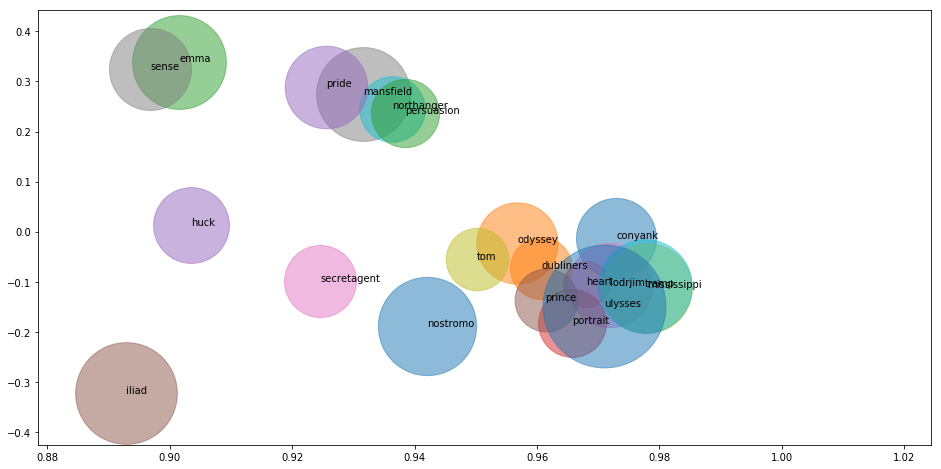

In [56]:
rcParams['figure.figsize'] = 16, 8

xs, ys = lsaOut[:,0], lsaOut[:,1]
for i in range(len(xs)): 
    plt.scatter(xs[i], ys[i], s=lengths[i], alpha=0.5)
    plt.annotate(labels[i], (xs[i], ys[i]))

Jane Austen's novels are all clustered together. *Huckleberry Finn* and *The Iliad* are outliers among the rest of the texts which are all clustered around each other.

## Load pickled data

```
books = [nlp(open(doc, errors='ignore').read()) for doc in bookFilenames]
```

was passed in order to run nlp on each text. The resulting memory usage required required me to create a pickle file of the the data.
```
with open('books.pickle', 'wb') as f:
    pickle.dump(books, f)
```

In [57]:
with open('books.pickle', 'rb') as f:
    books = pickle.load(f)

## Average Sentence Length

In [12]:
sentLengths = [ np.mean([len(sent) for sent in doc.sents]) for doc in books ]

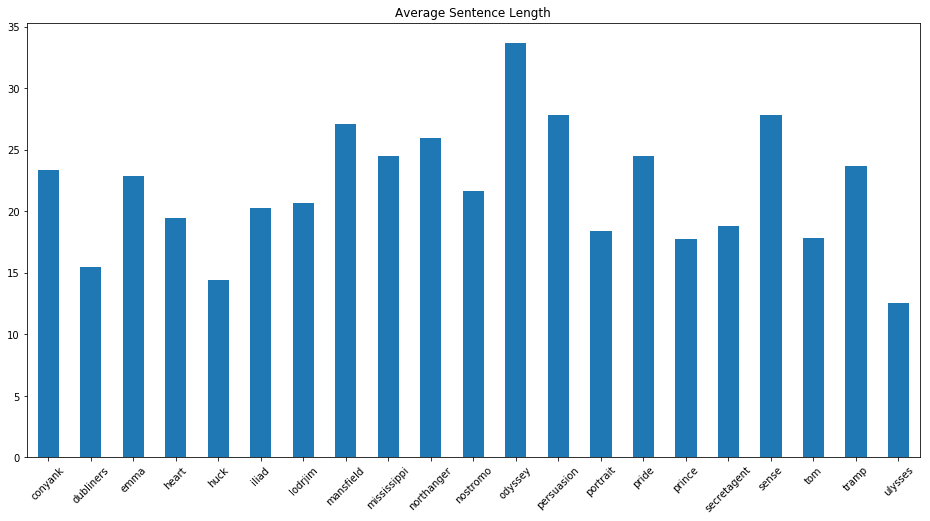

In [62]:
pd.Series(sentLengths, index=labels).plot(kind='bar', title='Average Sentence Length', rot=45)

It looks like Austen's works are fairly consistent, averaging between 23-27 words per sentence.

## Term Frequency Distribution

Count the occurance of words and divide by the total number of words in the document. Store the series' as a dictionary to add labels to the data, then turn the dictionary to a DataFrame.

In [63]:
booksSeries = [pd.Series(Counter(   
                    [word.string.strip().lower() 
                     for word in doc]))/len(doc) 
                     for doc in books]

seriesDict = {label: series for label, series in zip(labels, booksSeries)}

booksDf = pd.DataFrame(seriesDict).T.fillna(0)

In [64]:
booksDf.head()

,,!,"""","""--",#,$,%,&,','bout,...,ãƒâ‡a,ãƒâ‰lus,ãƒâ€,ã‚â£,ã‚â£.,ï»¿life,ï»¿the,”,…,™
conyank,0.092844,0.003399,0.015955,0.000026,0.0,0.000058,0.0,0.000000,0.000410,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
dubliners,0.071045,0.001714,0.000000,0.000000,0.0,0.000000,0.0,0.000012,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000035,0.000023,0.015149
emma,0.066776,0.003421,0.019439,0.000059,0.0,0.000000,0.0,0.000015,0.001010,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
heart,0.062259,0.003037,0.004546,0.000000,0.0,0.000000,0.0,0.000020,0.017360,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
huck,0.082235,0.003094,0.020680,0.000070,0.0,0.000006,0.0,0.000000,0.005301,0.000268,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000


Explore the proportions between the use of the words 'happy' and 'sad':

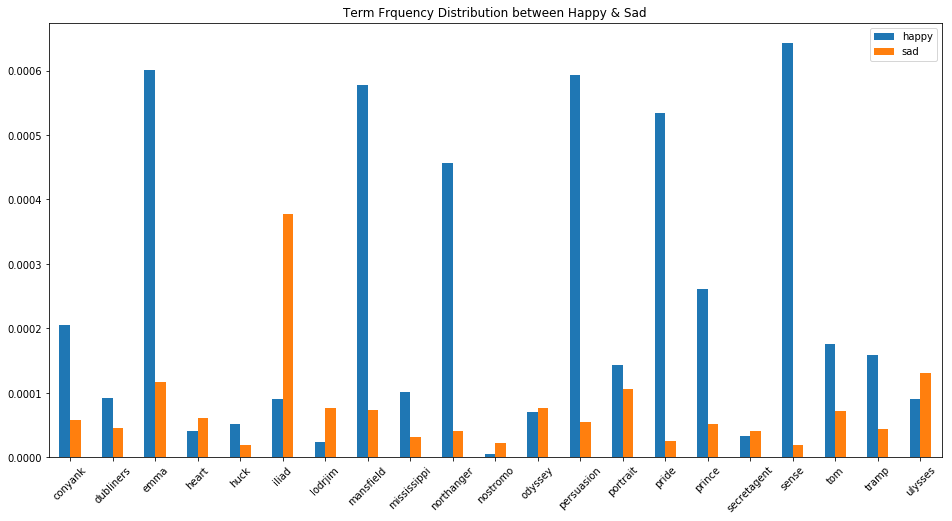

In [91]:
booksDf[['happy', 'sad']].plot(kind='bar', title='Term Frquency Distribution between Happy & Sad', rot=45)

Compute the ratio of uses of the word "happy" and "sad":

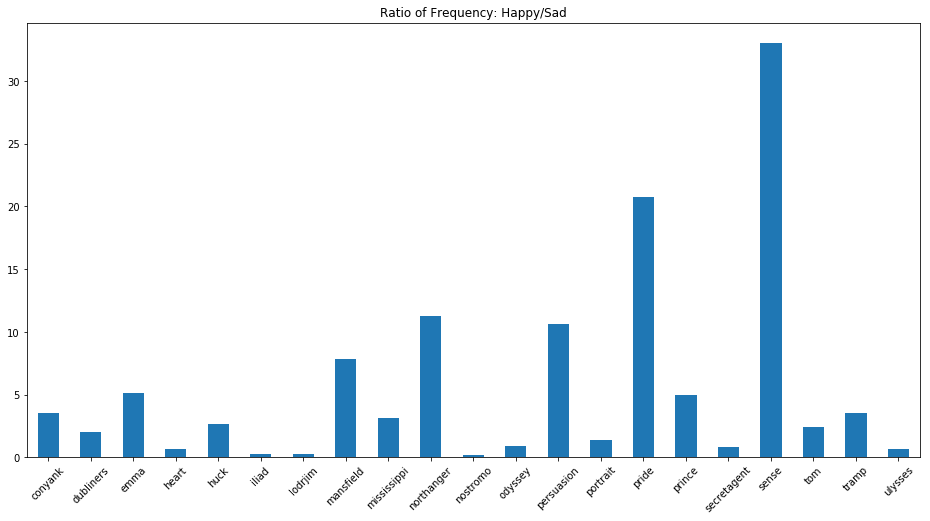

In [90]:
HappySadRatio = booksDf['happy']/booksDf['sad']
HappySadRatio.plot(kind='bar', title='Ratio of Frequency: Happy/Sad', rot=45)

Jane Austen's works show that the author much preferred to use the word "happy" in her writing, in comparison to her use of "sad."

# Individual Text Exploration

In [101]:
for novel in books:
    conyank = books[0]
    dubliners = books[1]
    emma = books[2]
    heart = books[3]
    huck = books[4]
    iliad = books[5]
    lordjim = books[6]
    mansfield = books[7]
    mississippi = books[8]
    northanger = books[9]
    nostromo = books[10]
    odyssey = books[11]
    persuasion = books[12]
    portrait = books[13]
    pride = books[14]
    prince = books[15]
    secretagent = books[16]
    sense = books[17]
    tom = books[18]
    tramp = books[19]
    ulysses = books[20]

# Parts of Speech
Spacy already has created a part of speech and associated tag for each word.

Below is a list of all the parts of speech in *A Connecticut Yankee in King Arthur's Court*

In [102]:
tagDict = {w.pos: w.pos_ for w in conyank} 
tagDict

{0: '',
 83: 'ADJ',
 84: 'ADP',
 85: 'ADV',
 88: 'CCONJ',
 89: 'DET',
 90: 'INTJ',
 91: 'NOUN',
 92: 'NUM',
 93: 'PART',
 94: 'PRON',
 95: 'PROPN',
 96: 'PUNCT',
 98: 'SYM',
 99: 'VERB',
 100: 'X',
 102: 'SPACE'}

Compare the distribution ooof parts of speech between *A Connecticut Yankee in King Arthur's Court* and *Pride and Prejiduce*:

In [35]:
conyankPOS = pd.Series(conyank.count_by(spacy.attrs.POS))/len(conyank)
pridePOS = pd.Series(pride.count_by(spacy.attrs.POS))/len(pride)

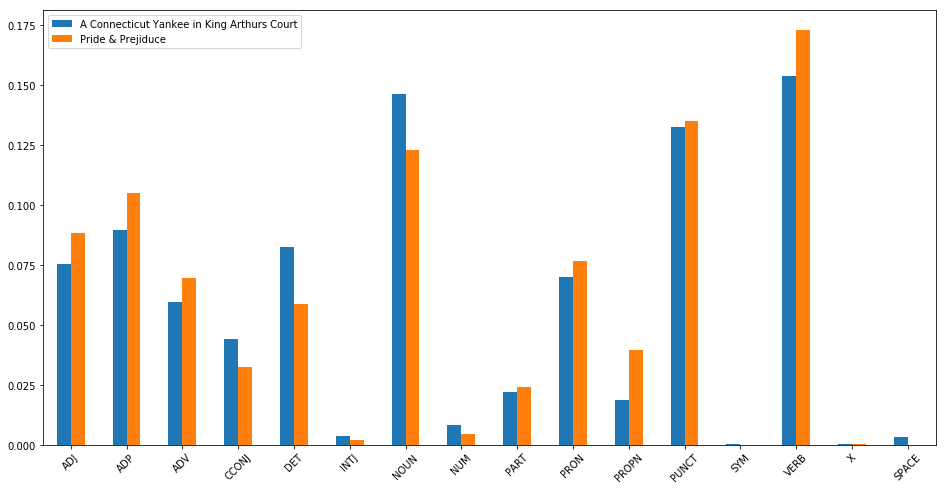

In [103]:
df_POS = pd.DataFrame([conyankPOS, pridePOS], index=['A Connecticut Yankee in King Arthurs Court', 'Pride & Prejiduce'])
df_POS.columns = [tagDict[column] for column in df_POS.columns]
df_POS.T.plot(kind='bar', rot=45)

In [109]:
conyankVERB = [ w for w in conyank if w.pos_ == 'VERB']
prideVERB = [ w for w in pride if w.pos_ == 'VERB']

In [110]:
Counter([w.string.strip() for w in conyankVERB]).most_common(10)

[('was', 2176),
 ('had', 944),
 ('is', 819),
 ('be', 653),
 ('were', 597),
 ('would', 569),
 ('could', 499),
 ('have', 497),
 ('said', 400),
 ('do', 328)]

In [111]:
Counter([w.string.strip() for w in prideVERB]).most_common(10)

[('was', 1843),
 ('be', 1236),
 ('had', 1152),
 ('is', 835),
 ('have', 831),
 ('were', 561),
 ('been', 515),
 ('could', 515),
 ('would', 468),
 ('_', 435)]

## Jane Austen Parts of Speech Distribution

In [124]:
emmaPOS = pd.Series(emma.count_by(spacy.attrs.POS))/len(emma)
mansfieldPOS = pd.Series(mansfield.count_by(spacy.attrs.POS))/len(mansfield)
northangerPOS = pd.Series(northanger.count_by(spacy.attrs.POS))/len(northanger)
persuasionPOS = pd.Series(persuasion.count_by(spacy.attrs.POS))/len(persuasion)
pridePOS = pd.Series(pride.count_by(spacy.attrs.POS))/len(pride)
sensePOS = pd.Series(sense.count_by(spacy.attrs.POS))/len(sense)

df_austen_POS = pd.DataFrame([emmaPOS, mansfieldPOS, northangerPOS, persuasionPOS, pridePOS, sensePOS], 
                         index=['Emma', 'Mansfield', 'Northanger', 'Persuasion', 'Pride', 'Sense'])
df_austen_POS.columns = [tagDict[column] for column in df_austen_POS.columns]
#df_austen_POS.T.plot(kind='bar', rot=45)

## Joseph Conrad Parts of Speech Distribution

In [125]:
heartPOS = pd.Series(heart.count_by(spacy.attrs.POS))/len(heart)
lordjimPOS = pd.Series(lordjim.count_by(spacy.attrs.POS))/len(lordjim)
nostromoPOS = pd.Series(nostromo.count_by(spacy.attrs.POS))/len(nostromo)
secretagentPOS = pd.Series(secretagent.count_by(spacy.attrs.POS))/len(secretagent)

df_conrad_POS = pd.DataFrame([heartPOS, lordjimPOS, nostromoPOS, secretagentPOS], 
                         index=['Heart of Darkness', 'Lord Jim', 'Nostromo', 'Secret Agent'])
df_conrad_POS.columns = [tagDict[column] for column in df_conrad_POS.columns]
#df_conrad_POS.T.plot(kind='bar', rot=45)

## Mark Twain Parts of Speech Distribution

In [126]:
conyankPOS = pd.Series(conyank.count_by(spacy.attrs.POS))/len(conyank)
huckPOS = pd.Series(huck.count_by(spacy.attrs.POS))/len(huck)
mississippiPOS = pd.Series(mississippi.count_by(spacy.attrs.POS))/len(mississippi)
princePOS = pd.Series(prince.count_by(spacy.attrs.POS))/len(prince)
tomPOS = pd.Series(tom.count_by(spacy.attrs.POS))/len(tom)
trampPOS = pd.Series(sense.count_by(spacy.attrs.POS))/len(tramp)

df_twain_POS = pd.DataFrame([conyankPOS, huckPOS, mississippiPOS, princePOS, tomPOS, trampPOS], 
                         index=['Connecticut Yankee', 'Huck Finn', 'Mississippi', 'Prince & Pauper', 'Tow Saywer', 'Tramp Abroad'])
df_twain_POS.columns = [tagDict[column] for column in df_twain_POS.columns]
#df_twain_POS.T.plot(kind='bar', rot=45)

## Homer Parts of Speech Distribution

In [127]:
iliadPOS = pd.Series(iliad.count_by(spacy.attrs.POS))/len(iliad)
odysseyPOS = pd.Series(odyssey.count_by(spacy.attrs.POS))/len(odyssey)

df_homer_POS = pd.DataFrame([iliadPOS, odysseyPOS], index=['Iliad', 'Odyssey'])
df_homer_POS.columns = [tagDict[column] for column in df_homer_POS.columns]
#df_homer_POS.T.plot(kind='bar', rot=45)

## James Joyce Parts of Speech Distribution

In [128]:
dublinersPOS = pd.Series(dubliners.count_by(spacy.attrs.POS))/len(dubliners)
portraitPOS = pd.Series(portrait.count_by(spacy.attrs.POS))/len(portrait)
ulyssesPOS = pd.Series(ulysses.count_by(spacy.attrs.POS))/len(ulysses)

df_joyce_POS = pd.DataFrame([dublinersPOS, portraitPOS, ulyssesPOS], 
                         index=['Dubliners', 'Portrait of Artist as Young Man', 'Ulysses'])
df_joyce_POS.columns = [tagDict[column] for column in df_joyce_POS.columns]
#df_joyce_POS.T.plot(kind='bar', rot=45)

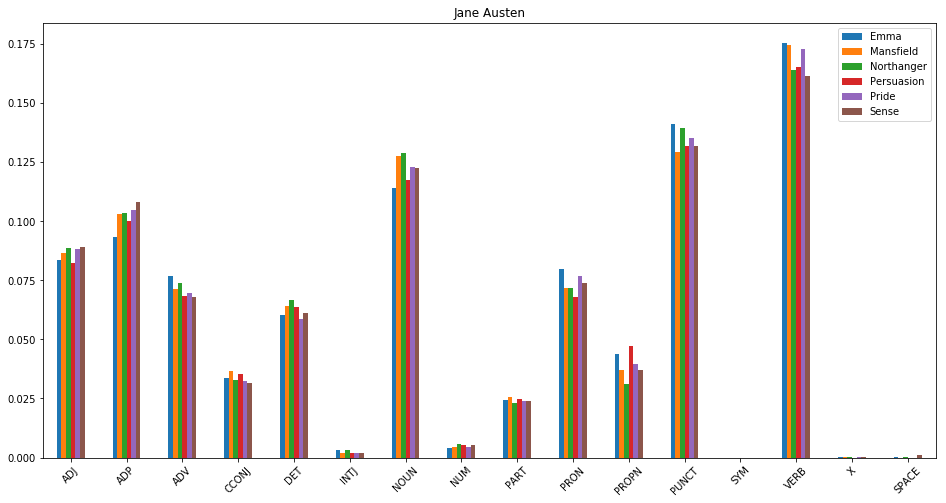

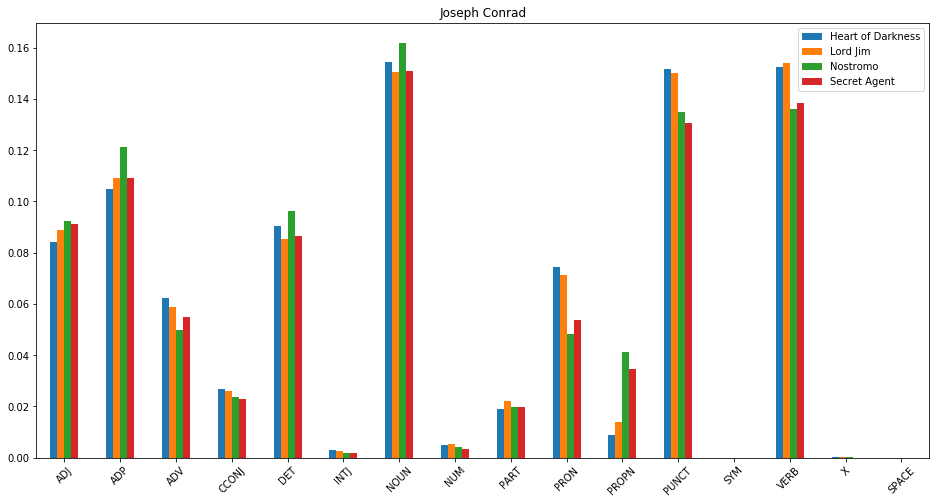

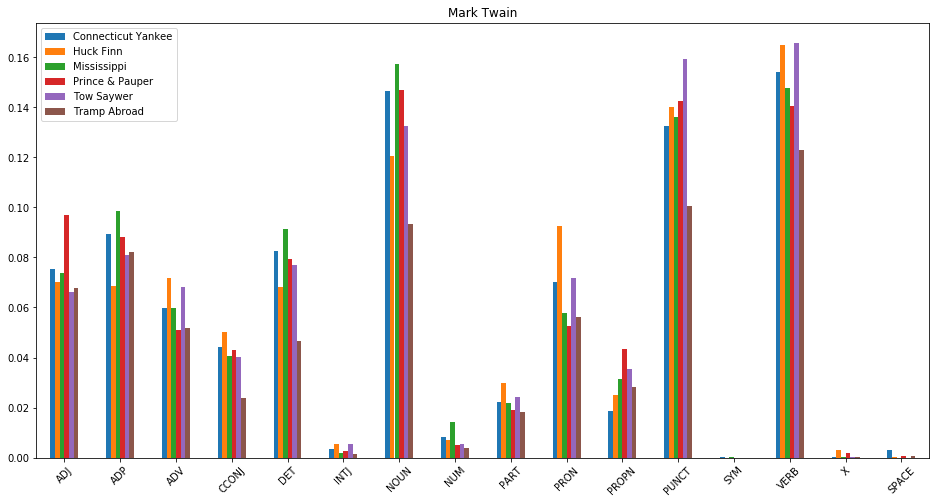

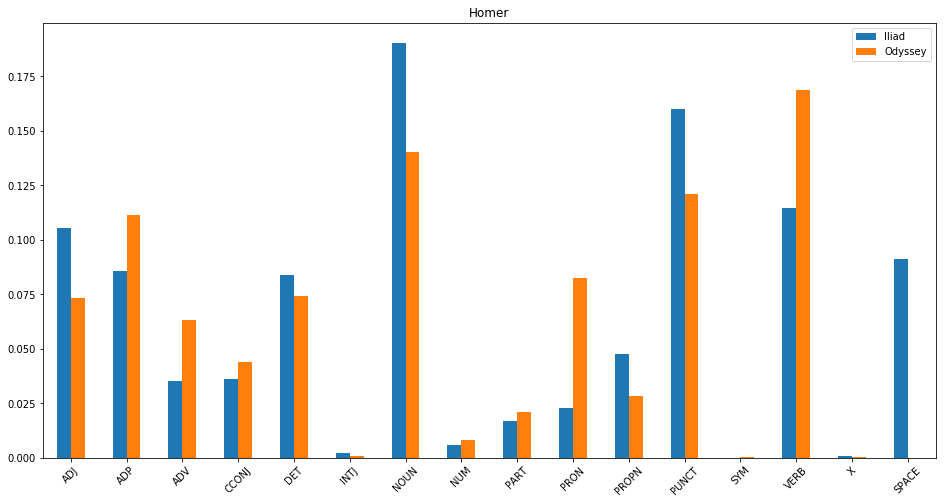

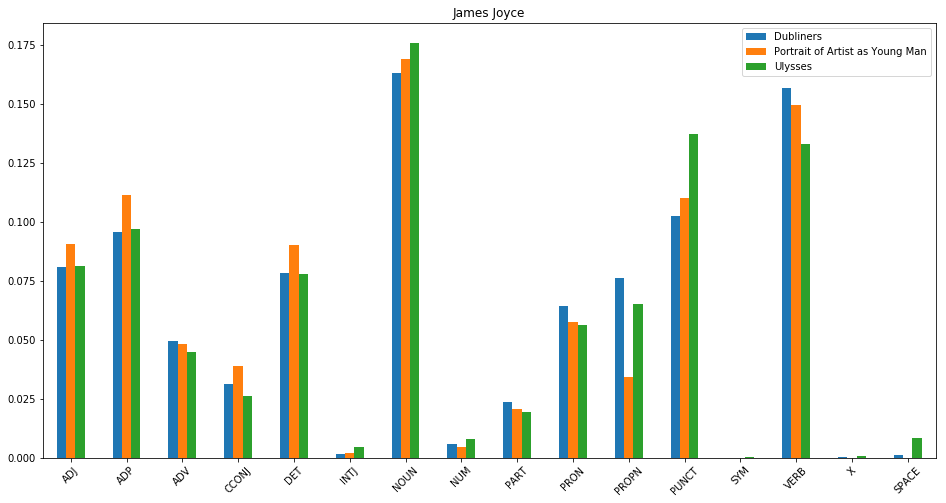

In [123]:
df_austen_POS.T.plot(kind='bar', title='Jane Austen', rot=45)
df_conrad_POS.T.plot(kind='bar', title='Joseph Conrad', rot=45)
df_twain_POS.T.plot(kind='bar', title='Mark Twain', rot=45)
df_homer_POS.T.plot(kind='bar', title='Homer', rot=45)
df_joyce_POS.T.plot(kind='bar', title='James Joyce', rot=45)

# Word Vectorization

SpaCy uses GloVe vectors. Used to calculate semantic similarity between words and documents, word vectors (embeddings) are numeric representations of words.

Let's explore the vectors for *A Portrait of the Artist as a Young Man*. First, get the first 100 nouns:

In [129]:
portraitNOUNS = [ word for word in portrait if word.pos_.startswith('N')][:100]

Next, get the vecotrs and labels for each of them:

In [130]:
portraitNOUNSVecs = [ word.vector for word in portraitNOUNS]
portraitNOUNSLabels = [ word.string.strip() for word in portraitNOUNS]

In [131]:
portraitNOUNSVecs[0].shape

(384,)

In [132]:
lsaOut_portraitNOUNSVecs = lsa.fit_transform(portraitNOUNSVecs)

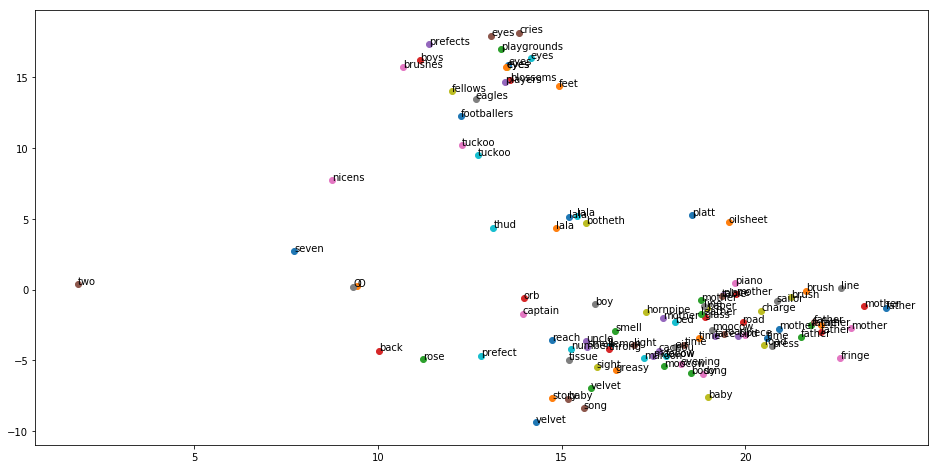

In [133]:
xs, ys = lsaOut_portraitNOUNSVecs[:,0], lsaOut_portraitNOUNSVecs[:,1]
for i in range(len(xs)):
    plt.scatter(xs[i], ys[i])
    plt.annotate(portraitNOUNSLabels[i], (xs[i], ys[i]))

# Conclusion

SpaCy allows for a plethora of queries to be made fom our text. Document vectorization, term frequency distributions, average sentence lengths and part of speech tagging; SpaCy has proved very useful in exploring the data set.

### Questions 
* Does each author posess a statistically unique style which can be identified through nlp?
* What are going to be the features needed to ensure each author is being represented evenly?